# Tarea 4
## Matemáticas para la Ciencia de Datos
## Docente: **Briceyda B. Delgado**
## Alumno: **Luis Fernando Izquierdo Berdugo**
## Fecha: **23 de Septiembre de 2024**

### Instrucciones
1. Explique las semejanzas y difencias entre los método de Bisección, de Newton y de la Secante.
2. Implementar y utilizar el método de Newton para encontrar una raíz de una función polinómica $f(x) = x^3 - 6x^2 + 11x -6$
    - Implementa el método de Newton en Python para encontrar una raíz de la función $f(x)$.
    - Usa una tolerancia de $10^{-6}$ para el criterio de convergencia.
    - Prueba tu implementación con un valor inicial de $x_0 = 1.5$
    - Grafica la función $f(x)$ y marca la raíz encontrada en la gráfica.
    - Analiza y comenta sobre la convergencia del método con el valor inicial elegido.
3. Consideremos la función $g(x) = (x+1)(x-1)(x-2)$.
    - Implemente el método de Newton tomando como valor inicial $x_0 = 0.$
    - ¿Hacia que valor converge el método?
    - Explique qué fenómeno de convergencia o divergencia se ilustra con este ejemplo.
    - Implementa algún otro método numérico (Bisección, Secante, Punto fijo) para encontrar una raíz de $g(x)$

## Inciso 1

La principal similitud entre los métodos de Bisección, de Newton y de la secante es que son métodos iterativos, al igual que los 3 se basan en encontrar las raices de una ecuación no lineal, siendo estos los valores de $x$ donde $f(x) = 0$

Para el método de bisección se obtiene la media de dos valores de x y se detendrá hasta encontrar el intervalo donde la función cambia de signo. Este es el más lento de los 3. Utiliza las iteraciones de la forma:

#### $c = \frac{1}{2}(a+b)$

En el método de Newton se usa la tangente a la curva (la derivada) y se irá iterando hasta que el valor de $f(x)$ sea menor que el de la tolerancia $\epsilon$. Debido a que puede reducir en gran manera el intervalo, es el más veloz de los 3 métodos. Usa iteraciones de la forma:

#### $x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$

El método de la secante, como su nombre lo indica, utiliza la secante para calcular las raices de la ecuación, de igual manera, este iterará hasta que el valor de $f(x)$ sea menor que el de la tolerancia $\epsilon$. Este método es más veloz que el de la bisección y un poco más lento que el de Newton. Este utiliza las iteraciones de la forma:

#### $x_{k+1} = x_k - f(x_k)\frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}$

## Inciso 2

Para implementar el método de Newton en Python se creará la función correspondiente. Esta tomará los siguientes parámetros:
- `fx` es la función a evaluar
- `dx` es la derivada de la función
- `x0`es el valor inicial $x_0$
- `e` es la tolerancia
- `iter` es el límite de iteraciones a ejecutar.

La función tendrá las excepciones para cuando se llega al máximo de iteraciones y cuando la derivada da 0, lo cual implica que no hay una solución.

In [126]:
import numpy as np
import matplotlib.pyplot as plt
def Newton(fx, dx, x0, e, iter):
    x = x0
    k = 0
    for n in range(0, iter):
        fxn = fx(x)
        if abs(fxn) < e:
            print(f'Se llegó a la solución x = {x} con {k} iteraciones')
            return x
        dfx = dx(x)
        if dfx == 0:
            print('Sin solución, la derivada es 0')
            return None
        x = x - fxn/dfx
        k += 1
    print('Se llegó al máximo de iteraciones y no se encontró una respuesta')
    return None
        
    

Se usan los parámetros de entrada y las funciones proporcionadas para evaluar la función

In [127]:
fx = lambda x: x**3 - 6*x**2 + 11*x - 6
dx = lambda x: 3*x**2 - 12*x + 11
e = 10**-6
raiz = Newton(fx, dx, 1.5, e, 30)

Se llegó a la solución x = 3.0 con 1 iteraciones


Ya con la solución, se hace una grafica de la función original donde se marcará con un punto el valor encontrado para la raiz

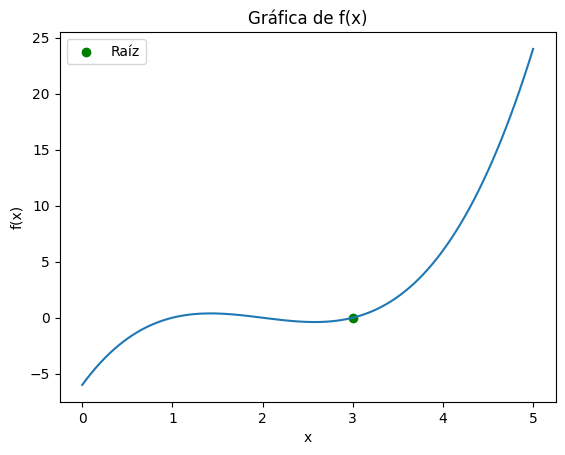

In [128]:
x_vals = np.linspace(0, 5, 100)
y_vals = fx(x_vals)

plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x)')
plt.scatter(raiz, 0, color='green', label='Raíz')
plt.legend()
plt.show()

Se encuentra que la convergencia en este caso es rápida, ya que el valor de $x_0$ elegido está bastante cercano a una raiz (siendo en este caso 3), esto aumenta las probabilidades de una convergencia veloz y una raíz correcta.

## Inciso 3
3. Consideremos la función $g(x) = (x+1)(x-1)(x-2)$.
    - Implemente el método de Newton tomando como valor inicial $x_0 = 0.$
    - ¿Hacia que valor converge el método?
    - Explique qué fenómeno de convergencia o divergencia se ilustra con este ejemplo.
    - Implementa algún otro método numérico (Bisección, Secante, Punto fijo) para encontrar una raíz de $g(x)$

In [129]:
fx1 = lambda x: x**3 - 2*x**2 - x + 2
dx1 = lambda x: 3*x**2 - 4*x - 1
raiz2 = Newton(fx1, dx1, 0, e, 30)

Se llegó a la solución x = 2.0 con 1 iteraciones


In [130]:
def secante(f, x0, x1, e, iter):
    k = 0
    for n in range(iter):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(f(x2)) < e:
            print(f"Se llegó a la solución x = {x2} con {k} iteraciones")
            return x2
        x0, x1 = x1, x2
        k += 1

    print("Se alcanzó el número máximo de iteraciones sin encontrar la raíz.")
    return None

In [131]:
raiz_secante = secante(fx1, 0, 3, e, 30)

Se llegó a la solución x = -1.0 con 0 iteraciones


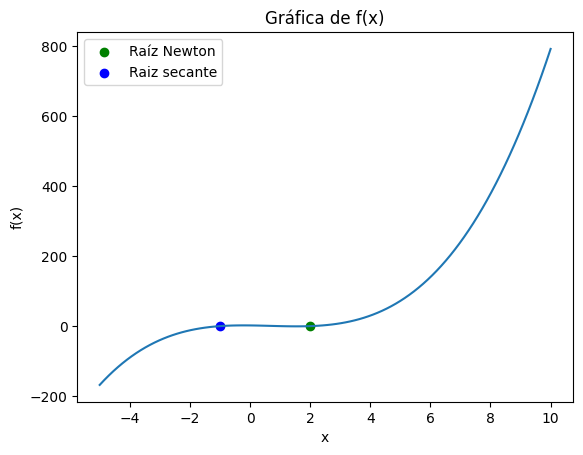

In [132]:
x_vals = np.linspace(-5, 10, 100)
y_vals = fx1(x_vals)

plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x)')
plt.scatter(raiz2, 0, color='green', label='Raíz Newton')
plt.scatter(raiz_secante, 0 ,color='blue', label = 'Raiz secante')
plt.legend()
plt.show()

Se observa en este caso que el método de Newton se acercó hacia la raiz que se encuentra en 2 y el método de la secante se acercó a la raiz encontrada en -1. Se puede observar en la gráfica que el intervalo entre -1 y 2 se encuentran oscilando cerca del 0, por lo que estos método encontraron uno cercano y lo dieron como resultado.

En el caso de que la función de Newton hubiera evaluado primero x = 0, probablemente se hubiera encontrado con un ciclo límite que iba a hacer que itere de manera infinita entre los valores sin llegar a la raiz (porque se inició directamente ahí).

## Bibliografía

- Tveito et al. (n.d.) Elements of scientific computing. Springer Heidelberg Dordrecht London New York. https://doi.org/10.1007/978-3-642-11299-7

- Google. (2024). Gemini (Sep 20 version) [Large language model]. https://gemini.google.com/app